## Project :- Analyze A/B Test Results
By Hem Bharti
### Overview

A/B tests are very commonly performed by data analysts and data scientists.

#### Step I - Probability

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `ab_dataframe`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
ab_dataframe = pd.read_csv('C:/Users/Administrator/Downloads/ab_data.csv')
ab_dataframe.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
ab_dataframe.shape

(294478, 5)

c. The number of unique users in the dataset.

In [4]:
ab_dataframe.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
ab_dataframe.converted.mean()*100

11.96591935560551

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
ab_dataframe.group.unique(), ab_dataframe.landing_page.unique()

(array(['control', 'treatment'], dtype=object),
 array(['old_page', 'new_page'], dtype=object))

In [7]:
treat = ab_dataframe.query("group == 'treatment' and landing_page == 'old_page'").shape[0]
control = ab_dataframe.query("group == 'control' and landing_page == 'new_page'").shape[0]
misalignment = treat + control
misalignment

3893

f. Do any of the rows have missing values?

In [8]:
ab_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **ab_dataframe2**.

In [9]:
ab_dataframe.drop(ab_dataframe.query("group == 'treatment' and landing_page == 'old_page'").index, inplace =True)
ab_dataframe.drop(ab_dataframe.query("group == 'control' and landing_page == 'new_page'").index, inplace =True)
ab_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


In [10]:
ab_dataframe.to_csv('C:/Users/Administrator/Downloads/ab_data2.csv',index=False)

In [11]:
ab_dataframe2 = pd.read_csv('C:/Users/Administrator/Downloads/ab_data2.csv')

In [12]:
ab_dataframe2[((ab_dataframe2['group'] == 'treatment') == (ab_dataframe2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **ab_dataframe2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **ab_dataframe2**?

In [13]:
ab_dataframe2.user_id.nunique()

290584

b. There is one **user_id** repeated in **ab_dataframe2**.  What is it?

In [14]:
ab_dataframe2[ab_dataframe2.user_id.duplicated(keep=False)].user_id

1876    773192
2862    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [15]:
ab_dataframe2[ab_dataframe2.user_id.duplicated(keep=False)]

,user_id,timestamp,group,landing_page,converted
1876,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2862,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [16]:
ab_dataframe2.drop_duplicates('user_id',inplace=True)
ab_dataframe2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 290584
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


`4.` Use **ab_dataframe2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [17]:
ab_dataframe.converted.mean()

0.11959667567149027

b. Given that an individual was in the `control` group, what is the probability they converted?

In [18]:
ab_dataframe.query("group == 'control'").converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [19]:
ab_dataframe2.query("group == 'treatment'").converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [20]:
 ab_dataframe2.query("landing_page == 'new_page'").shape[0]/ab_dataframe2.landing_page.shape[0]

0.5000619442226688

e. Use the results in the previous two portions of this question to suggest if you think there is evidence that one page leads to more conversions?  Write your response below.

**From above we can see that the number of individuals who converted from either group is almost identical which was equivalent to 12% of each group.Hence there is no concrete evidence suggesting that those who explore either page will neccessary lead to more converstations.**

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

$$ H_0: p_{new} <= p_{old}$$

$$ H_1: p_{new} > p_{old}$$

$$\alpha = 0.05$$

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [21]:
p_new = ab_dataframe2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [22]:
p_old = ab_dataframe2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [23]:
n_new = ab_dataframe2.query("group == 'treatment'").shape[0]
n_new

145310

d. What is $n_{old}$?

In [24]:
n_old = ab_dataframe2.query("group == 'control'").shape[0]
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.choice([0,1], size = n_new, p=[p_new,1-p_new]) 

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.choice([0,1],size = n_old ,p = [p_old,1-p_old]) 

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
p_diff = new_page_converted.mean() - old_page_converted.mean()
p_diff

-0.0004381449071692023

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in **p_diffs**.

In [28]:
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.choice([0,1], size = n_new, p=[p_new,1-p_new]).mean()
    old_page_converted = np.random.choice([0,1], size = n_old, p=[p_old,1-p_old]).mean()
    p_diffs.append(new_page_converted - old_page_converted)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

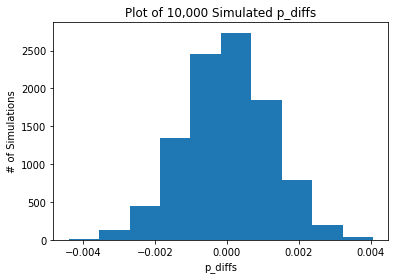

In [29]:
plt.hist(p_diffs);
plt.title('Plot of 10,000 Simulated p_diffs')
plt.xlabel('p_diffs')
plt.ylabel('# of Simulations');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [30]:
p_diffs = np.array(p_diffs)
act_diffs = ab_dataframe2.query("group == 'treatment'").converted.mean() - ab_dataframe2.query("group == 'control'").converted.mean()
act_diffs

-0.0015782389853555567

In [31]:
(p_diffs > act_diffs).mean()

0.909

k. In words, explain what you just computed in part **j.**.  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**In the previous,we were calculating the p-value which is the probability of getting our statistic or a more extreme value if the null is true.having the large p-value goes on to say that the statistic is more likely to come from our null hypothesis;hence ,there is no statistical evidence to reject the null hypothesis which states that old pages are the same or slightly better than the new pages.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [32]:
import statsmodels.api as sm

convert_old = ab_dataframe2.query("group == 'control'").converted.sum()
convert_new = ab_dataframe2.query("group == 'treatment'").converted.sum()
n_old = ab_dataframe2.query("landing_page == 'old_page'").shape[0]
n_new = ab_dataframe2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [33]:
z_score,p_value = sm.stats.proportions_ztest([convert_old, convert_new],[n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

In [34]:
# significance of our z-score
from scipy.stats import norm 
norm.cdf(z_score)

0.9050583127590245

In [35]:
# check critical value at 95% confidence interval
norm.ppf(1-(0.05/2))

1.959963984540054

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**results above deduced a z_score of 1.31.since this value does not exceed the critical value at 95% confidence interval(1.96);there is no statistical evidence to reject the null hypothesis.furthermore,p-value obtained is similar to the result obtained from our previous findings in j and k.which also fails to reject the null hypothesis as it provides evidence of a higher probability of the null hypothesis.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

Logistic regression. It is because the response variable categorical instead of continuous values.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a colun for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [36]:
ab_dataframe2['intercept'] = 1
dummy = pd.get_dummies(ab_dataframe2['group'])
ab_dataframe2['ab_page'] = dummy['treatment']
ab_dataframe.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [37]:
log_mod = sm.Logit(ab_dataframe2['converted'],ab_dataframe2[['intercept','ab_page']])

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
from scipy import stats 
stats.chisqprob = lambda chisq, ab_dataframe2: stats.chi2.sf(chisq,ab_dataframe2)
results = log_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:               8.077e-06
Time:                        15:03:30   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in the **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

The p-value is 0.19. It is different from the value we obtain in Part II since the null hyphotheses and alternative hypotheses are different. 

For the previous part, the null hypotheses is that the new page perform equal or worse than the old page. The alternative hypotheses is that the new page performs better than the old page.

On the other hand, the regression model tests the null hypothesis that the type of the page has no correlation with the dependent variable. In this case, it is a two tailed test.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Because there are several cases where combination of several factors lead to better model for the prediction. The disadvantages are when the additional terms is not independent of the other terms. Also, it makes the model much complicated, which may take longer time to train. Thus, if the performance gain is so little, we might prefer simpler model. 

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy varaibles.** Provide the statistical output as well as a written response to answer this question.

In [39]:
countries = pd.read_csv('C:/Users/Administrator/Downloads/countries.csv')
countries.country.nunique(), countries.country.value_counts()

(3,
 US    203619
 UK     72466
 CA     14499
 Name: country, dtype: int64)

In [40]:
ab_dataframe2 = ab_dataframe2.merge(countries, on='user_id', how='left')
ab_dataframe2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US


In [41]:
countr = pd.get_dummies(ab_dataframe2['country'])
ab_dataframe2['country_CA'] = countr['CA']
ab_dataframe2['country_UK'] = countr['UK']

In [42]:
model2 = sm.Logit(ab_dataframe2['converted'], ab_dataframe2[['intercept','ab_page', 'country_CA', 'country_UK']])
result2 = model2.fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [43]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:               2.323e-05
Time:                        15:03:31   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_CA    -0.0408      0.027     -1.516      0.130      -0.093       0.012
country_UK     0.0099      0.013      0.743      0.457      -0.016       0.036
==============================================================================
"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [44]:
ab_dataframe2['UK_ind_ab_page'] = ab_dataframe2['country_UK']*ab_dataframe2['ab_page']
ab_dataframe2['CA_ind_ab_page'] = ab_dataframe2['country_CA']*ab_dataframe2['ab_page']
logit_h = sm.Logit(ab_dataframe2['converted'], ab_dataframe2[['intercept', 'ab_page', 'country_UK', 'country_CA', 'UK_ind_ab_page', 'CA_ind_ab_page']])

In [45]:
result3 = logit_h.fit()
result3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 10 Jul 2020   Pseudo R-squ.:               3.482e-05
Time:                        15:03:33   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page           -0.0206      0.014     -1.505      0.132      -0.047       0.006
country_UK        -0.0057      0.019     -0.306      0.760      -0.043       0.031
country_CA        -0.0175      0.038     -0.465      0.642      -0.091       0.056
UK_ind_ab_page     0.0314      0.027      1.181      0.238      -0.021       0.084
CA_ind_ab_page    -0.0469      0.054     -0.872      0.383      -0.152       0.059
==================================================================================
"""

## Conclusion

In conclusion, the two models we made above is not a good model. It shows that:
1. The type of the page does not correlate to the user conversion.
2. The country where the user live is not a good indicator of user conversion.
3. The interaction between country and type of page also don't correlate to the user conversion.